In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("London.csv")

In [3]:
df

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


Text(0.5, 1.0, 'Original data set')

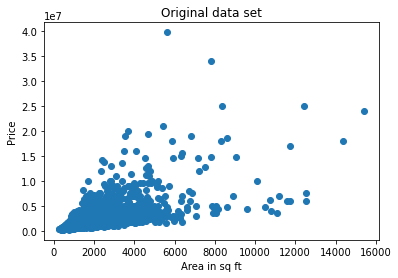

In [4]:
plt.scatter(df['Area in sq ft'], df.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price')
plt.title('Original data set')

In [5]:
#creating new data set with relevant features and reducing the size of it for a training sample first
df1 = df[['Price','Area in sq ft']]
df1 = df1.sample(n=200, random_state=1)

In [6]:
#checking for any missing values
df1.isnull().sum()

Price            0
Area in sq ft    0
dtype: int64

Text(0.5, 1.0, 'Reduced data set')

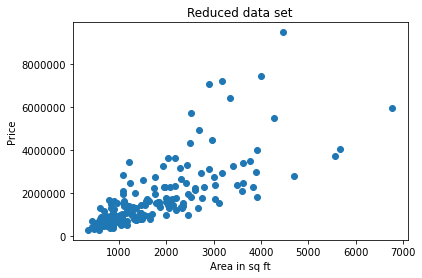

In [12]:
plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(df1['Area in sq ft'], df1.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price')
plt.title('Reduced data set')

In [8]:
#manually removing outliers in the data
df1.drop(df1[df1['Price'] > 10_000_000].index, inplace = True)
df1.drop(df1[df1['Area in sq ft'] > 9_000].index, inplace = True)

Text(0.5, 1.0, 'Final data set')

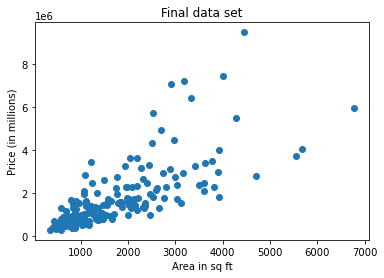

In [13]:
#replotting with the new data
plt.scatter(df1['Area in sq ft'], df1.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price (in millions)')
plt.title('Final data set')

In [10]:
#Making the linear regression model
df1

,Price,Area in sq ft
3081,900000,902
2173,825000,687
136,1750000,1580
364,2100000,3596
368,1280000,1169
...,...,...
2992,2500000,1227
3146,807995,1650
188,765000,1362
203,1850000,2516


In [62]:
w = 1_000
b = 1_000

In [63]:
#plotting a linear function to play around with manually finding a best fit line
def linear_function(x, w, b):

    m = df1.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * df1.iloc[i]['Area in sq ft'] + b
        
    return(f_wb)

In [64]:
tmp_f_wb = linear_function(df1['Area in sq ft'], w, b)

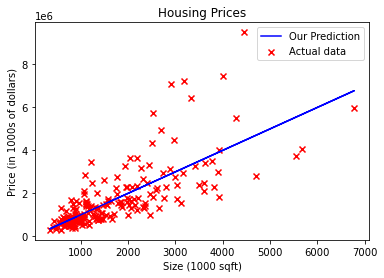

In [65]:
# Plot our model prediction
plt.plot(df1['Area in sq ft'], tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(df1['Area in sq ft'], df1.Price, marker='x', color='red', label='Actual data')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [66]:
print(np.zeros(m))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
